# OpenCV
- Open Source Computer Vision
- C, C++, Java, Python, ...
- In python, Numpy + OpenCV is awesome!
- Image warping, filtering, binize, edge detect, pattern recognition, ROI, ...

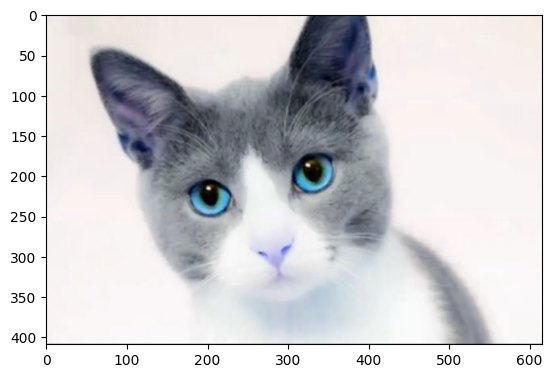

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

imgcv = cv2.imread('./imgs/cat.jpg')

plt.imshow(imgcv)       # 다른 색깔의 이미지가 나타난다.

아래와 같이 Matplotlib와 opencv에서 사용하는 채널 순서가 다르기 때문에

위와 같이 색 변형이 나타난다.

- Matplotlib : R-G-B

- OpenCV : B-G-R



그렇기 때문에 아래와 같이 Convert color method를 사용하여 변환해주어야 한다.

-> cv2.cvtColor(imgcv, cv2.COLOR_BGR2RGB)

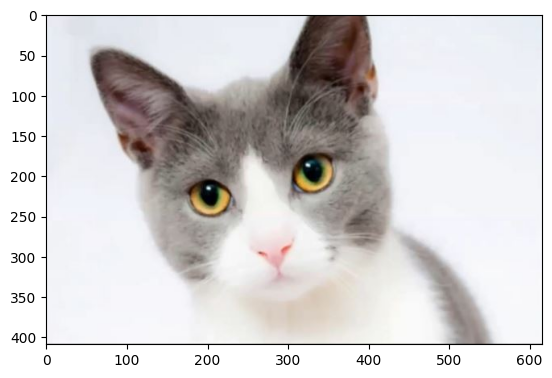

In [7]:
imgcv_rgb = cv2.cvtColor(imgcv, cv2.COLOR_BGR2RGB)
plt.imshow(imgcv_rgb)

# OpenCV imshow

OpenCV를 사용할 경우 BGR순서가 지켜지기 때문에 BGR2RGB를 사용할 필요가 없다.

cv2.imshow('title', img)

No BGR2RGB

In [8]:
cv2.imshow('cv2 imshow cat', imgcv) 
cv2.waitKey(0)
cv2.destroyAllWindows()

# OpenCV imwrite
변환한 이미지 저장
- cv2.imwrite('filename', image)

In [ ]:
cv2.imwrite('./imgs/wierd_cat.jpg', imgcv_rgb)

# OpenCV Image Binize(이진화)

Image를 grayscale로 변환

-> cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

이후 cv2.threshold, cv2.adaptiveThreshold 사용      # threshold를 0 또는 1로 변환

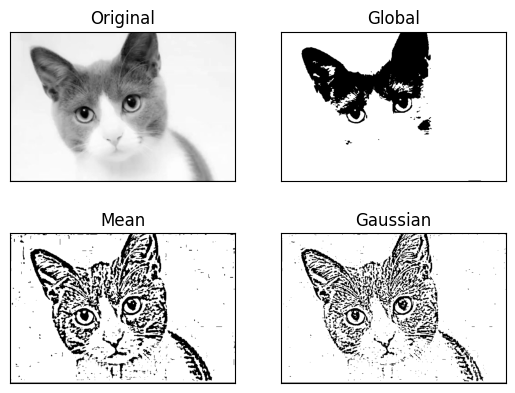

In [12]:
from PIL import Image

img = cv2.imread('./imgs/cat.jpg', cv2.IMREAD_GRAYSCALE)        # 그레이스케일로 먼저 변환 필수
# 변환하지 않을 경우 다음의 에러 발생
# -> error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::adaptiveThreshold'


ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)      # 127 이하 -> 0, 127 이상 -> 1
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)         # 특정 영역(15, 2)값에서 이상이면 1, 이하면 0
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)         # 특정 영역(15, 2)값에서 이상이면 1, 이하면 0

titles = ['Original', 'Global', 'Mean', 'Gaussian']

images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# OpenCV Image Transformations

In [13]:
# 이미지 사이즈 변경하기
# cv2.resize(img, dsize, fx, fy, interpolation)        *interpolation : 보간법

img = imgcv.copy()

height, width = img.shape[:2]

# 이미지 축소
shrink = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Manual Size 지정
zoom1 = cv2.resize(img, (width*2, height*2), interpolation=cv2.INTER_CUBIC)

# 배수 Size 지정
zoom2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

cv2.imshow('Original', img)
cv2.imshow('Shrink', shrink)
cv2.imshow('Zoom1', zoom1)
cv2.imshow('Zoom2', zoom2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# 이미지 위치 변경하기(Translation)
# cv2.warpAffine(src, 변환행렬, dsize)

# 변환행렬, X축으로 100, Y축으로 200 이동
M = np.float32([[1, 0, 100], [0, 1, 200]])

dst = cv2.warpAffine(img, M, (width, height))
cv2.imshow('Original', img)
cv2.imshow('Translation', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# 이미지 회전하기(Rotation)
# cv2.getRotationMatrix2D(center, angle, scale)해서 변환행렬 생성

M = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.8)
dst = cv2.warpAffine(img, M, (width, height))

cv2.imshow('Rotation', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
# 이미지 Affine 변환하기(3개의 match point 사용)
# pts1[[x1, y1], [x2, y2], [x3, y3]] -> pts2[[x1', y1'], [x2', y2'], [x3', y3']]

img = imgcv.copy()
rows, cols, _ = img.shape

pts1 = np.float32([[200, 100], [400, 100], [200, 200]])
pts2 = np.float32([[200, 300], [300, 200], [200, 400]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('Affine', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
#이미지 Perspective 변환하기(4개의 match point 사용)
# [x, y]좌표로 4*2 행렬 구성, L upper - L lower - R upper - R lower

img = imgcv.copy()

# 좌표점은 좌상->좌하->우상->우하
pts1 = np.float32([[220, 110], [140, 270], [360, 110], [470, 300]])
pts2 = np.float32([[10, 10], [10, 500], [500, 10], [500, 500]])

# pts1의 좌표에 표시
cv2.circle(img, (220, 110), 20, (255,0,0), -1)
cv2.circle(img, (140, 270), 20, (0,255,0), -1)
cv2.circle(img, (360, 110), 20, (0,0,255), -1)
cv2.circle(img, (470, 300), 20, (255,0,0), -1)

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (510, 510))

cv2.imshow('Pers', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

# OpenCV Image Filtering
cv2.blur(src, ksize)
cv2.GaussianBlur(img, ksize, sigmaX)
cv2.medianBlur(src, ksize): window값 정렬 후 중간값 

In [19]:
img = imgcv.copy()

dst1 = cv2.blur(img, (7,7))
dst2 = cv2.GaussianBlur(img, (5,5), 0)
dst3 = cv2.medianBlur(img, 9)

images = [img, dst1, dst2, dst3]
cv2.imshow('Orig', img)
cv2.imshow('Filter1', dst1)
cv2.imshow('Filter2', dst2)
cv2.imshow('Filter3', dst3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
# 직접 filter 지정해서 넣는 경우 : cv2.filter2D()

img = imgcv.copy()

# kernel 필터 직접 지정
kernel = np.ones((7,7)) / 49        # 7*7 Matrix를 제곱으로 나누어준다.
dst = cv2.filter2D(img, -1, kernel)     # -1은 입력, 출력 크기 맞추기

cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
# 다양한 형태의 커널 지정 가능

img = imgcv.copy()

kernel = np.array([[1,0,1], [0,1,0], [1,0,1]])
dst = cv2.filter2D(img, -1, kernel)

cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

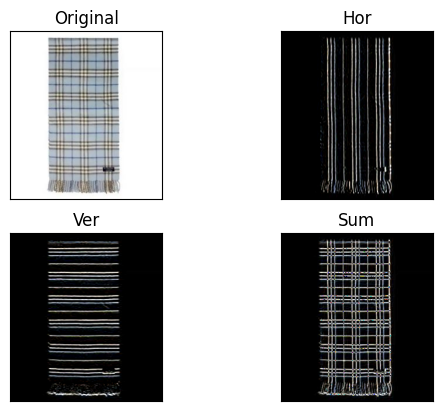

In [22]:
# Edgedetection with cv2.filter2D()

img = cv2.imread('./imgs/edge.jpg')

kernel_ver = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_hor = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

dst_v = cv2.filter2D(img, -1, kernel_ver)
dst_h = cv2.filter2D(img, -1, kernel_hor)

titles = ['Original', 'Hor', 'Ver', 'Sum']
images = [img, dst_v, dst_h, dst_v+dst_h]
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

In [23]:
# OpenCV에서 제공하는 라이브러리도 필터링해보기
# Implemented in the library - Edge detection
# Sobel Edge Detector

sobel_v = cv2.Sobel(img, -1, 1, 0, ksize=3)
sobel_h = cv2.Sobel(img, -1, 0, 1, ksize=3)

Implemented in the library – Edge detection

• Canny Edge Detection → multi-stage algorithm

• Noise Reduction, 5x5 Gaussian filter

• Finding Intensity Gradient of the Image, Sobel kernel in both horizontal and vertical direction

• Non-maximum Suppression, Get biggest gradient direction

• Hysteresis Thresholding, Find "sure-edge" pixels


cv2.Canny(img, threshold1, threshold2, edges=None, apertureSize=None, L2gradient=None)

In [24]:
canny = cv2.Canny(img, 100, 200)